(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [6]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

%matplotlib inline

# Dimension Reduction 

In [ ]:
# Data dimensionality reduction

# Data visualization

# Preprocessing for supervised learning

## Randomized projection

In [ ]:
# ~1M -> ~1K

In [7]:
from sklearn import random_projection, datasets, metrics

In [4]:
# random_projection.GaussianRandomProjection
# random_projection.SparseRandomProjection

### Gaussian random projection

In [11]:
print(random_projection.johnson_lindenstrauss_min_dim(n_samples=100, eps=0.1))
print(random_projection.johnson_lindenstrauss_min_dim(n_samples=1000, eps=0.1))
print(random_projection.johnson_lindenstrauss_min_dim(n_samples=10000, eps=0.1))

3947
5920
7894


In [34]:
print(random_projection.johnson_lindenstrauss_min_dim(n_samples=100, eps=0.1))
print(random_projection.johnson_lindenstrauss_min_dim(n_samples=100, eps=0.01))
print(random_projection.johnson_lindenstrauss_min_dim(n_samples=100, eps=0.001))

3947
370886
36865938


In [36]:
print(random_projection.johnson_lindenstrauss_min_dim(n_samples=1000, eps=0.5))

331


In [37]:
# X, Y = datasets.make_blobs(n_samples=100, n_features=10000, centers=3, random_state=1)
X, Y = datasets.make_blobs(n_samples=1000, n_features=10000, centers=3, random_state=1)

In [43]:
print(X.shape)
print(Y.shape)

(1000, 10000)
(1000,)


In [39]:
# gaussian_rp = random_projection.GaussianRandomProjection(n_components='auto', eps=0.1, random_state=1)
# gaussian_rp = random_projection.GaussianRandomProjection(n_components=5000, eps=0.1, random_state=1)
gaussian_rp = random_projection.GaussianRandomProjection(n_components='auto', eps=0.5, random_state=1)

In [40]:
%%time
# fit_transform: fit and transform
Xnew = gaussian_rp.fit_transform(X)
print(Xnew.shape)

(1000, 331)
CPU times: user 411 ms, sys: 12.7 ms, total: 424 ms
Wall time: 425 ms


In [41]:
gaussian_rp.components_.shape

(331, 10000)

In [ ]:
# Projection

# X: [num_examples, num_feature_old] = [m, n_old] 
# T: Transformation matrix (components_): [n_old, n_new] ([n_new, n_old])
# Xnew: [num_examples, num_feature_new]: [m, n_new]

# Xnew = X.dot(T) = (m, n_old).dot((n_old, n_new)) = (m, n_new)

In [46]:
%%time
Xdist = metrics.pairwise_distances(X)
Xdist_new = metrics.pairwise_distances(Xnew)

CPU times: user 578 ms, sys: 27.3 ms, total: 606 ms
Wall time: 527 ms


In [47]:
print(Xdist.shape)
print(Xdist_new.shape)

(1000, 1000)
(1000, 1000)


In [48]:
rel_error = abs(Xdist - Xdist_new) / (Xdist + 1e-7)

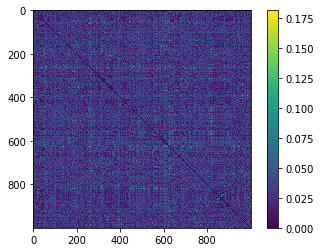

In [49]:
plt.imshow(rel_error)
plt.colorbar()
plt.show()

In [50]:
T = gaussian_rp.components_
print(T.shape)

(331, 10000)


In [61]:
print(type(T))

<class 'numpy.ndarray'>


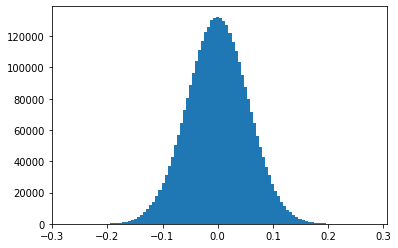

In [51]:
_ = plt.hist(T.ravel(), bins=100)
plt.show()

### Sparse random projection

In [52]:
print(X.shape)
print(Y.shape)

(1000, 10000)
(1000,)


In [53]:
sparse_rp = random_projection.SparseRandomProjection(n_components='auto', eps=0.5, random_state=1)

In [54]:
%%time
Xnew = sparse_rp.fit_transform(X)
print(Xnew.shape)

(1000, 331)
CPU times: user 345 ms, sys: 48.5 ms, total: 393 ms
Wall time: 523 ms


In [55]:
Tsparse = sparse_rp.components_

In [56]:
Tsparse.shape

(331, 10000)

In [60]:
print(type(Tsparse))

<class 'scipy.sparse.csr.csr_matrix'>


In [63]:
Tsparse.nnz

32801

In [57]:
%%time
Xdist = metrics.pairwise_distances(X)
Xdist_new = metrics.pairwise_distances(Xnew)

CPU times: user 557 ms, sys: 30.3 ms, total: 587 ms
Wall time: 450 ms


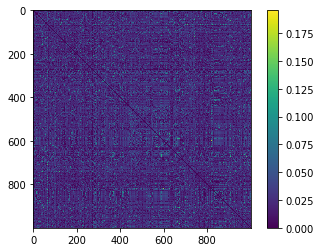

In [58]:
rel_error = abs(Xdist - Xdist_new) / (Xdist + 1e-7)
plt.imshow(rel_error)
plt.colorbar()
plt.show()

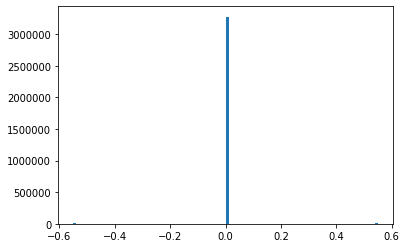

In [65]:
_ = plt.hist(Tsparse.toarray().ravel(), bins=100)
plt.show()

## Principle component analysis

In [67]:
# visualize data through scatterplot 
data = datasets.load_iris()
X = data.data
Y = data.target

In [68]:
X.shape

(150, 4)

In [69]:
Y.shape

(150,)

In [70]:
import collections

In [71]:
collections.Counter(Y)

Counter({0: 50, 1: 50, 2: 50})

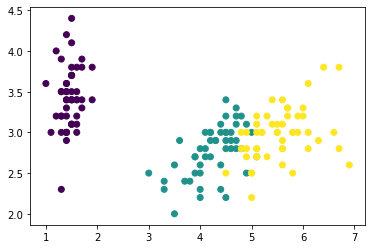

In [74]:
plt.scatter(X[:, 2], X[:, 1], c=Y)
plt.show()

### Linear PCA

In [75]:
from sklearn import decomposition

In [94]:
pca = decomposition.PCA(n_components=4, random_state=1)

In [95]:
%%time
Xnew = pca.fit_transform(X)

CPU times: user 1.13 ms, sys: 803 µs, total: 1.93 ms
Wall time: 2.07 ms


In [96]:
print(Xnew.shape)

(150, 4)


In [97]:
W = pca.components_
print(W.shape)
print(type(W))

(4, 4)
<class 'numpy.ndarray'>


In [98]:
# Xnew = X.dot(W.T) ( [150, 4].dot([4, 2]) -> [150, 2])

In [101]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [102]:
np.sum(pca.explained_variance_ratio_)

1.0

In [104]:
pca = decomposition.PCA(n_components=1, random_state=1)
Xnew = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.92461872])

In [105]:
from sklearn import linear_model

In [116]:
# modeling: data engineering (feature processing) -> modeling

# Before PCA
lr = linear_model.LogisticRegression(max_iter=1000)
lr.fit(X, Y)
Ypred = lr.predict(X)
metrics.confusion_matrix(Y, Ypred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [119]:
# include PCA (when num_features >> num_examples)
# Do dimensionality reduction by pca
pca = decomposition.PCA(n_components=1, random_state=1)

# fit the new features
lr = linear_model.LogisticRegression(max_iter=1000)
# add pca here
pca.fit(X)
Xpca = pca.transform(X)
# Xpca = pca.fit_transform(X)
lr.fit(Xpca, Y)
Ypred_pca = lr.predict(Xpca)
metrics.confusion_matrix(Y, Ypred_pca)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  4, 46]])

In [ ]:
# Test if pca included

# Xtest_pca = pca.transform(Xtest)
# ytest_pred_pca = lr.predict(Xtest_pca)

In [ ]:
# array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

# keep 1 dim
0.92

# keep 2 dims 
0.97 - 0.98

In [134]:
# [v1, v2, v3, ...]

# sum(v1 + .. + vi) >= 0.95

In [ ]:
# How PCA works? 
# Step 1. data are normalized by mean
# Step 2. Covarience matrix is calculated
# Step 3. Eig value & vectors are extracted
# Step 4. Sort by the eig values

### SVD

In [120]:
# Process (SVD approach)
data = datasets.load_iris()
X = data.data
Y = data.target

In [121]:
X = X - np.mean(X, axis=0)
print(X.shape)

(150, 4)


In [123]:
U, S, V = np.linalg.svd(X, full_matrices=False)

In [124]:
print(U.shape, S.shape, V.shape)

(150, 4) (4,) (4, 4)


In [125]:
S

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [130]:
explained_variance = (S ** 2) / X.shape[0]
explained_variance_ratio = explained_variance / np.sum(explained_variance)
#array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

print(explained_variance_ratio)

[0.92461872 0.05306648 0.01710261 0.00521218]


### Incremental PCA

In [ ]:
# what if data is huge!
# batch process

### Kernal PCA

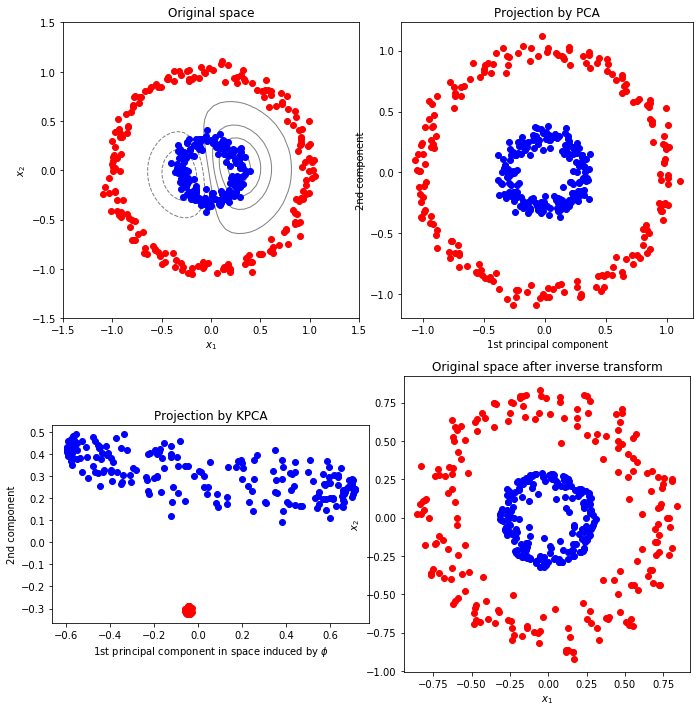

In [164]:
np.random.seed(0)

X, y = datasets.make_circles(n_samples=400, factor=.3, noise=.05)

kpca = decomposition.KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = decomposition.PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "ro")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.plot(X_back[reds, 0], X_back[reds, 1], "ro")
plt.plot(X_back[blues, 0], X_back[blues, 1], "bo")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)
plt.tight_layout()

plt.show()

## Manifold learning

### MDS

In [ ]:
# Multidimensional Scaling
# Principle: optimize "stress" along with configuration search
# Require n_components provided
# Optional: dissimilarity metrics

In [135]:
from sklearn import manifold

In [150]:
X, Y = datasets.make_swiss_roll(1000, random_state=1)

In [151]:
X.shape

(1000, 3)

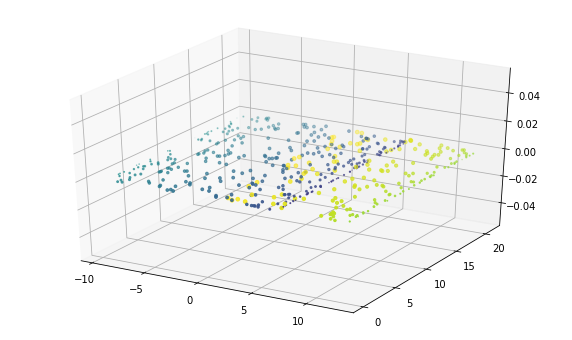

In [153]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x0, x1, x2 = X[:, 0], X[:, 1], X[:, 2]
plt.scatter(x0, x1, x2, c=Y)
plt.show()

In [154]:
mds = manifold.MDS(n_components=2, random_state=1)

In [155]:
Xnew = mds.fit_transform(X)
Xnew.shape

(1000, 2)

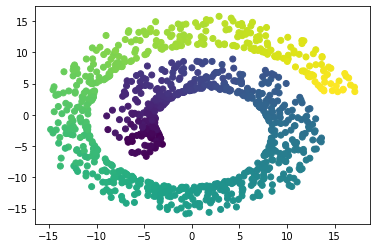

In [156]:
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=Y)
plt.show()

In [ ]:
# how the _stress changes

### IsoMap

In [ ]:
# Isometric Mapping
# Principle: use minimum path search to get "local" connection distance, then MDS or kernal PCA
# nearest neighbour + minimum distance calculation
# Require n_neighbors, n_components
# Optional: dissimilarity metrics

# 1. Construct neighborhood graph ['auto'|'brute'|'kd_tree'|'ball_tree']
# 2. Compute shortest paths ['auto'|'FW'|'D']
# 3. Construct d-dimensional embedding

In [ ]:
# http://wearables.cc.gatech.edu/paper_of_week/isomap.pdf

In [158]:
iso = manifold.Isomap(n_components=2, n_neighbors=5)

In [159]:
%%time
Xiso = iso.fit_transform(X)
print(Xiso.shape)

(1000, 2)
CPU times: user 373 ms, sys: 17.5 ms, total: 390 ms
Wall time: 395 ms


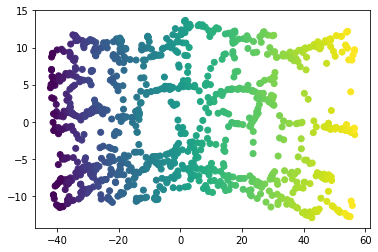

In [160]:
plt.scatter(Xiso[:, 0], Xiso[:, 1], c=Y)
plt.show()

# Demo: Visualizing NLP word embedding (Word2Vec)

In [ ]:
# changing the n_neighbors
# based on retain the probability between each pair

In [ ]:
# car: [1.0, 0.0, 0.0, 0.0]
# bike: [1.0, 0.1, 0.0, 0.0]
# they: [0.0, 0.0, 1.0, 0.0]
# he: [0.0, 0.0, 1.0, 0.1]

# car * bike ~ 1 
# car * they ~ 0
# they * he ~ 1

# embedding: m x n
# m: number of words in the vocabulary
# n: dimension of the word vector

In [3]:
import gensim
import matplotlib.cm as cm

In [4]:
%%time
model = gensim.models.KeyedVectors.load_word2vec_format('utils/GoogleNews-vectors-negative300-SLIM.bin.gz', 
                                                        binary=True)

CPU times: user 11.3 s, sys: 513 ms, total: 11.8 s
Wall time: 12 s


In [5]:
len(model.vocab)

299567

In [199]:
model['car'].shape

(300,)

In [162]:
len(model.vocab)

299567

In [163]:
model.similarity('car', 'suv')

0.60543627

In [164]:
model.similarity('car', 'football')

0.11346368

In [165]:
model.similarity('soccer', 'football')

0.7313548

In [166]:
def visualize_embedding_2d(embeddings, words=[], label='word2vec', a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label='word2vec')
    plt.title(label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.8, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', 
                     size=15)
    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [169]:
init_words = ["car", "bike", 'they', "he", "banana", "apple", "soccer", "football", "sports"]
words = init_words[:]
embeddings = [model[w] for w in words]

# Random words
for w in list(model.vocab)[:100]:
    words.append(w)
    embeddings.append(model[w])
    
embeddings = np.array(embeddings)
print(embeddings.shape)

(109, 300)


In [168]:
pca = decomposition.PCA(n_components=2, random_state=1)

In [171]:
embedding_2d = pca.fit_transform(embeddings)
print(embedding_2d.shape)

(109, 2)


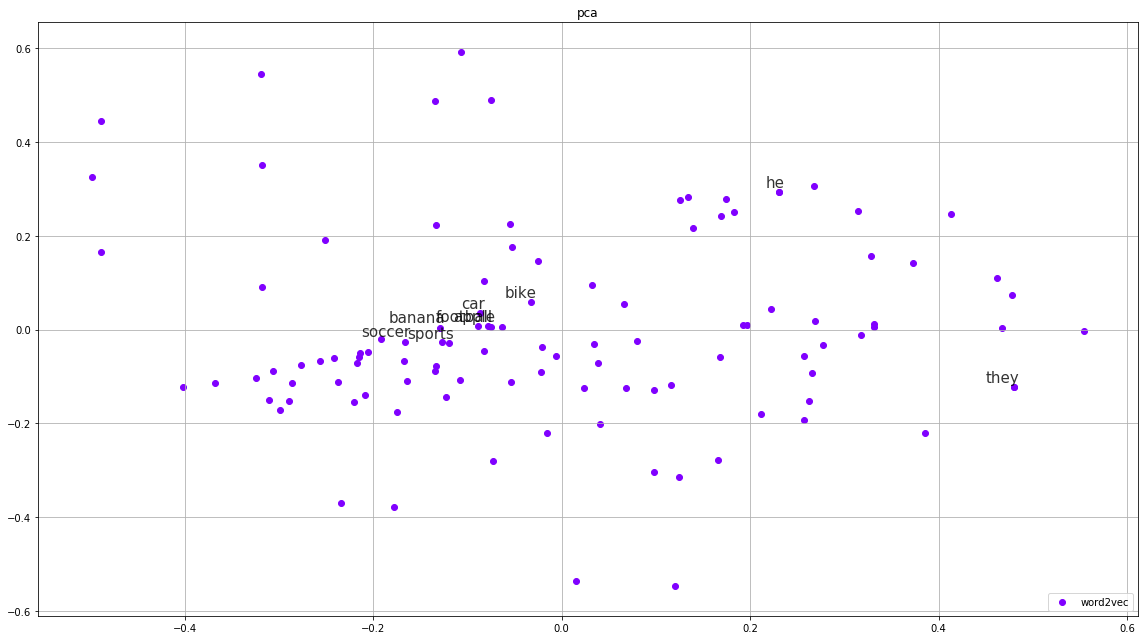

In [172]:
visualize_embedding_2d(embedding_2d, init_words, 'pca')

(109, 2)


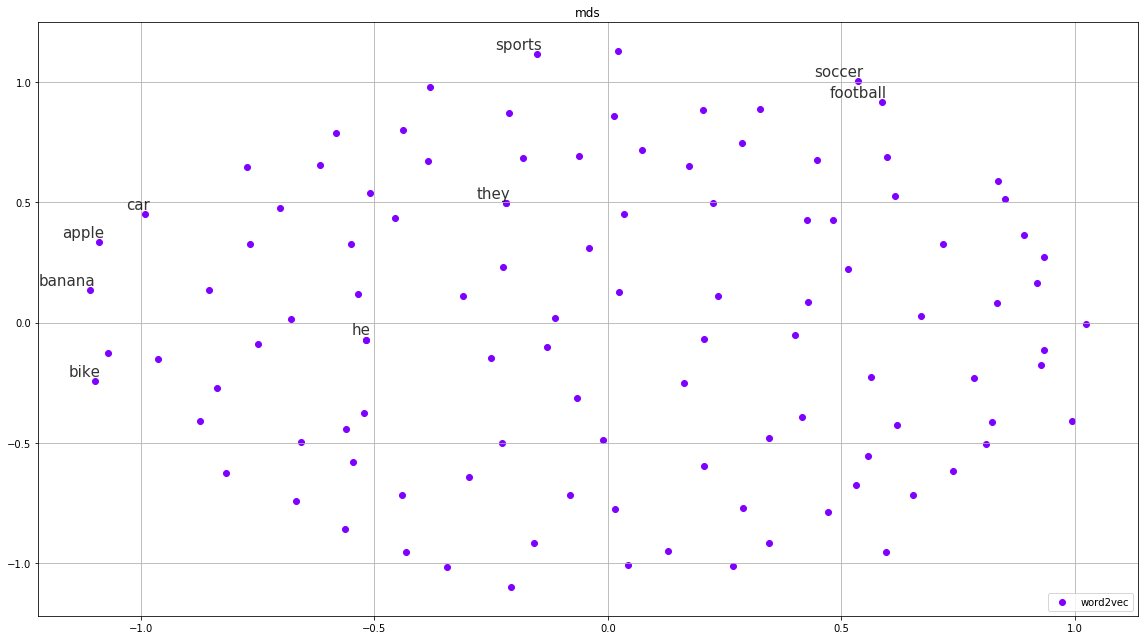

In [174]:
mds= manifold.MDS(n_components=2)
embedding_2d = mds.fit_transform(embeddings)
print(embedding_2d.shape)
visualize_embedding_2d(embedding_2d, init_words, 'mds')